##Task 2: Unemployment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Unemployment in India.csv'
df_unemployment= pd.read_csv(file_path)
df_unemployment.head(5)

Mounted at /content/drive


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
file_path = '/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv'
df_unemp= pd.read_csv(file_path)
df_unemp.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
print("Columns in df_unemployment:", df_unemployment.columns)
print("Columns in df_unemp:", df_unemp.columns)

Columns in df_unemployment: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in df_unemp: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
#Extra spaces
df_unemployment.columns = df_unemployment.columns.str.strip()
df_unemp.columns = df_unemp.columns.str.strip()

merged_unemp = pd.merge(df_unemployment, df_unemp, on=['Region', 'Date'], how='inner')
merged_unemp.head(5)

,Region,Date,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban,M,5.48,16635535,41.02,South,15.9129,79.74
2,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural,M,5.83,16545652,40.90,South,15.9129,79.74
3,Andhra Pradesh,29-02-2020,Monthly,5.66,4822035.0,36.84,Urban,M,5.83,16545652,40.90,South,15.9129,79.74
4,Andhra Pradesh,31-03-2020,Monthly,4.06,11359660.0,40.66,Rural,M,5.79,15881197,39.18,South,15.9129,79.74


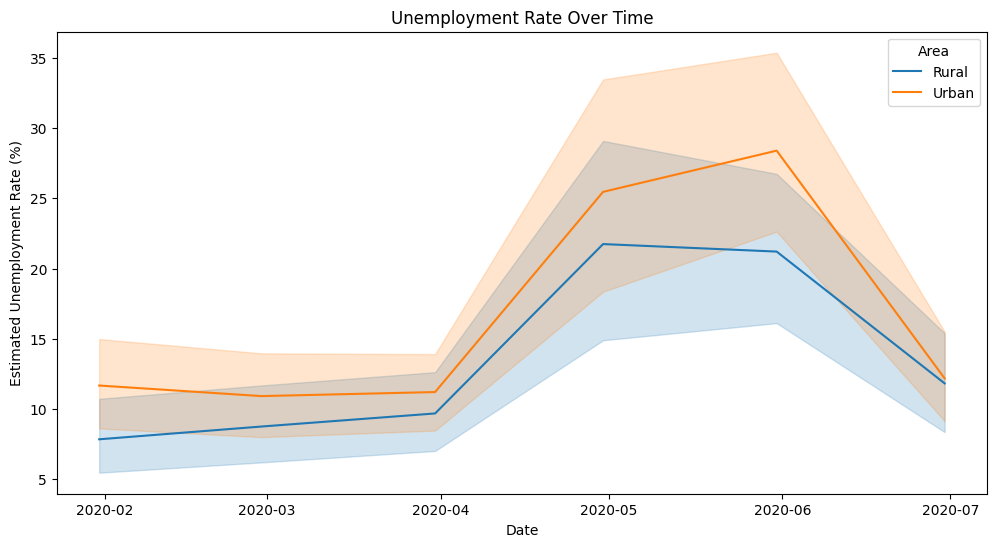

In [ ]:
merged_unemp['Date'] = merged_unemp['Date'].str.strip()

merged_unemp['Date'] = pd.to_datetime(merged_unemp['Date'], format='%d-%m-%Y')
plt.figure(figsize=(12, 6))
# Line plot
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)_x', hue='Area', data=merged_unemp)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Area')
plt.show()

##Unemployment Rate by Region

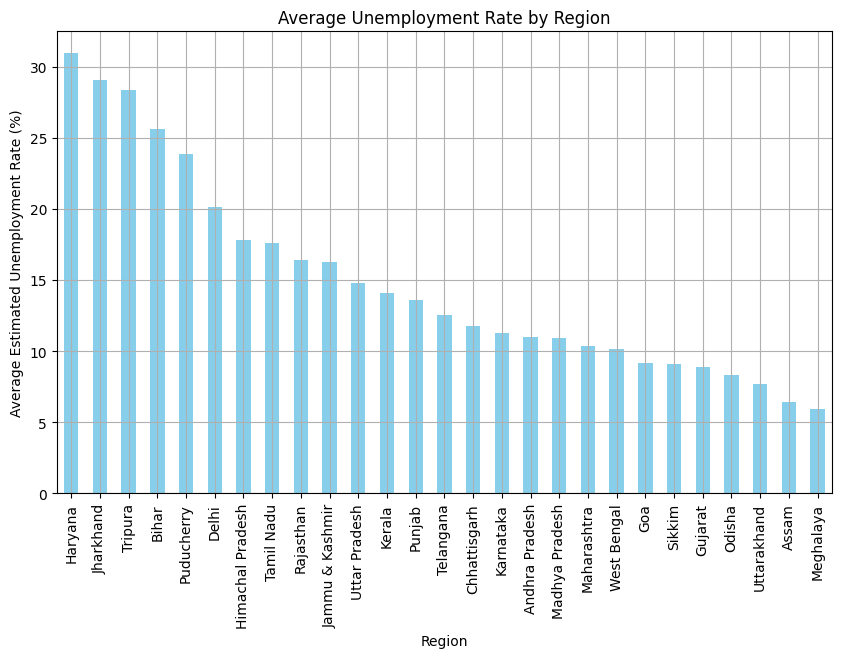

In [ ]:
avg_unemployment_by_region = merged_unemp.groupby('Region')['Estimated Unemployment Rate (%)_x'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_unemployment_by_region.plot(kind='bar', color='skyblue', grid=True)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/car data.csv'
df_car = pd.read_csv(file_path)
df_car.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [ ]:
X = df_car[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df_car['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

numeric_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.22
Mean Squared Error: 3.48
R-squared: 0.85


In [ ]:
new_car = pd.DataFrame({
    'Year': [2015],
    'Present_Price': [6.0],
    'Driven_kms': [35000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [0]
})

predicted_selling_price = model.predict(new_car)

print(f"Predicted Selling Price: {predicted_selling_price[0]:.2f}")


Predicted Selling Price: 4.41
